# Results Notebook with Selection

In this notebook I create plots from the data that comes from the simulations. The data of each individual simulation is saved in an .npy array and are parsed here to generate plots of multiple simulations using Seaborn 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join
from os import getcwd 


In [47]:
SIMULATION = 22
FEW_GROUPS_SIMULATION = 11
SIMULATION_SETTINGS = '100-20-100-100-05-05-True'

In [48]:
path = getcwd()

new_plot_path = path + '/output/plots/' + SIMULATION_SETTINGS
if not os.path.exists(new_plot_path):
    os.makedirs(new_plot_path)

## Parsing

In [49]:
longpath = path + '/output/data/' +  SIMULATION_SETTINGS
print(f'Files from path: {longpath} \n')
file_names = [f for f in listdir(f'{longpath}') if isfile(join(f'{longpath}', f))]
# file_names.remove('.DS_Store') #-- stupid Mac file

print(file_names)

Files from path: /Users/Tom/Desktop/Thesis_Code/Sim_V2/output/data/100-20-100-100-05-05-True 

['2020-07-18T13:47:04-avg_phenotypes_over_pop.npy', '2020-07-16T21:49:06-last_generation_groups.npy', '2020-07-16T22:17:19-last_generation_groups.npy', '2020-07-16T21:43:44-last_generation_groups.npy', '2020-07-16T22:15:52-avg_phenotypes_over_pop.npy', '2020-07-16T21:47:39-avg_phenotypes_per_group.npy', '2020-07-16T22:05:06-last_generation_groups.npy', '2020-07-18T13:52:41-avg-groupsize-over-pop.npy', '2020-07-18T13:50:05-avg_phenotypes_per_group.npy', '2020-07-16T21:44:59-avg_phenotypes_per_group.npy', '2020-07-16T22:15:52-avg-groupsize-over-pop.npy', '2020-07-16T21:44:59-last_generation_groups.npy', '2020-07-16T21:47:39-last_generation_groups.npy', '2020-07-18T13:42:59-avg_phenotypes_over_pop.npy', '2020-07-16T22:13:20-avg-groupsize-over-pop.npy', '2020-07-18T13:45:49-last_generation_groups.npy', '2020-07-16T22:06:31-last_generation_groups.npy', '2020-07-16T21:55:49-avg_phenotypes_per_group

In [50]:
''' File name coding: number_agents - number_groups - number_rounds - generations - tolerance - gossip probability - selection '''

avg_group_gen_file_names = [filename for filename in file_names if 'avg-groupsize-over-pop' in filename]
avg_phenotypes_file_names = [filename for filename in file_names if 'avg_phenotypes_over_pop' in filename]
avg_group_phenotypes_file_names = [filename for filename in file_names if 'avg_phenotypes_per_group' in filename]
last_gen_file_names = [filename for filename in file_names if 'last_generation_groups' in filename]

avg_group_gen_file_names.sort()
avg_phenotypes_file_names.sort()
avg_group_phenotypes_file_names.sort()
last_gen_file_names.sort()

loaded_avg_group_files = []
loaded_avg_phenotypes_files = []
loaded_avg_group_phenotypes_files = []
loaded_last_gen_files = []

for file in avg_group_gen_file_names:
    loaded_avg_group_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in avg_phenotypes_file_names:
    loaded_avg_phenotypes_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in last_gen_file_names:
    loaded_last_gen_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in avg_group_phenotypes_file_names:
    loaded_avg_group_phenotypes_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

''' Display the first 3 files that are loaded '''
print('Average group size per generation files: ')
for i, file in enumerate(loaded_avg_group_files[:2]):
    print(f'File name: {avg_group_gen_file_names[i]}')
    print(loaded_avg_group_files[i][:2])
    print()

print("Average phenotypes per generation: ")
for i, file in enumerate(loaded_avg_phenotypes_files[:2]):
    print(f'File name: {avg_phenotypes_file_names[i]}')
    print(loaded_avg_phenotypes_files[i][:2])
    print()

print("Average group phenotypes per generation: ")
for i, file in enumerate(loaded_avg_group_phenotypes_files[:2]):
    print(f'File name: {avg_group_phenotypes_file_names[i]}')
    print(loaded_avg_group_phenotypes_files[i][:1])
    print()

Average group size per generation files: 
File name: 2020-07-16T21:43:44-avg-groupsize-over-pop.npy
[[0
  array([ 5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.05,  5.15,  5.15,
        5.2 ,  5.15,  5.05,  5.05,  5.15,  5.2 ,  5.3 ,  5.35,  5.35,
        5.3 ,  5.3 ,  5.15,  5.2 ,  5.2 ,  5.2 ,  5.5 ,  5.3 ,  5.45,
        5.35,  5.35,  5.2 ,  5.4 ,  5.65,  5.85,  5.9 ,  5.9 ,  5.7 ,
        5.7 ,  5.75,  5.8 ,  5.8 ,  6.1 ,  6.45,  6.55,  6.75,  6.95,
        6.45,  6.5 ,  6.3 ,  6.8 ,  6.45,  6.8 ,  6.7 ,  7.15,  6.5 ,
        6.45,  6.5 ,  6.2 ,  6.45,  7.1 ,  7.25,  6.85,  7.05,  7.05,
        7.05,  7.4 ,  6.95,  7.2 ,  6.6 ,  6.15,  6.15,  6.6 ,  6.55,
        6.85,  7.1 ,  7.25,  7.45,  7.9 ,  8.6 ,  8.8 ,  8.7 ,  8.55,
        8.6 ,  8.35,  8.6 ,  8.35,  8.2 ,  7.75,  8.25,  7.95,  8.45,
        8.7 ,  8.6 ,  8.3 ,  8.85,  9.05,  9.3 ,  9.75,  9.6 ,  9.85,
       10.55])]
 [1
  array([ 5.  ,  5.  ,  5.  ,  5.05,  5.  ,  5.  ,  5.05,  5.05,  5.1 ,
        5.1 ,  5.25,  5.2 ,  5.3

In [51]:
generation_dataframes = [] #-- a list that contains dataframes that hold the average group size in the LAST round of a generation
for i, sim in enumerate(loaded_avg_group_files):
    # avg_group_size_last_round = []
    # print(sim)
                        
    temp_df = pd.DataFrame(columns = ['Simulation', 'Generation', 'Group size', 'Gossip probability', 'Tolerance'])

    for j, gen in enumerate(sim):

        avg_gossip_prob, avg_tolerance = loaded_avg_phenotypes_files[i][j]
        
        temp_df.loc[j] = [i, gen[0], gen[1][-1], avg_gossip_prob, avg_tolerance]

    generation_dataframes.append(temp_df)

all_sims_generations_dfs = pd.concat(generation_dataframes)
print(all_sims_generations_dfs.head())


Simulation  Generation  Group size  Gossip probability  Tolerance
0         0.0         0.0       10.55              0.5000     0.5010
1         0.0         1.0       15.15              0.5020     0.5020
2         0.0         2.0       14.65              0.5030     0.5000
3         0.0         3.0       15.30              0.5050     0.5000
4         0.0         4.0       18.60              0.5045     0.4985


In [52]:
index = 0

dfs = []
for i, sim in enumerate(loaded_avg_group_phenotypes_files):
    group_phenotype_df = pd.DataFrame(columns = ['Simulation', 'Generation', 'Group label', 'Gossip probability', 'Tolerance'])
    
    for group in enumerate(sim):
        
        group_num, phenotypes = group

        group_gossip_prob, group_tolerance = phenotypes
        

        for j, prob in enumerate(group_gossip_prob):
        
            group_phenotype_df.loc[index] = [i, j, "{:.0f}".format(group_num), prob, group_tolerance[j]]
            index += 1
    dfs.append(group_phenotype_df)
all_sims_groups_dfs = pd.concat(dfs)
print(all_sims_groups_dfs.head())

    

Simulation Generation Group label  Gossip probability  Tolerance
0          0          0           0                 0.5        0.5
1          0          1           0                 0.5        0.5
2          0          2           0                 0.5        0.5
3          0          3           0                 0.5        0.5
4          0          4           0                 0.5        0.5


In [53]:
index = 0

last_gen_df = pd.DataFrame(columns = ['Simulation', 'Round', 'Group label', 'Group size'])
# print(loaded_last_gen_files[0])
for sim_num, sim in enumerate(loaded_last_gen_files):

    for i, group in enumerate(sim):
        # print(i, group)
        for j, size in enumerate(group):

    #     print()
            last_gen_df.loc[index] = [sim_num, j, "{:.0f}".format(i), size]
            index += 1
print(last_gen_df.head())

Simulation Round Group label  Group size
0          0     0           0         0.0
1          0     1           0         0.0
2          0     2           0         0.0
3          0     3           0         0.0
4          0     4           0         0.0


## Plotting

In [54]:
sns.set_style("whitegrid")
# sns.set_context("paper")

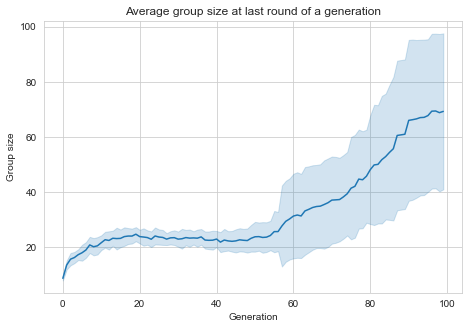

In [55]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=all_sims_generations_dfs, x='Generation', y='Group size', ci="sd")
plt.title("Average group size at last round of a generation")
# plt.tight_layout()
plt.savefig(os.path.join(new_plot_path, "groupsize_per_generation.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

# plt.savefig(f'{path}/output/plots/{date}-{args.nagents}-{args.ngroups}-{args.nrounds}-{args.generations}-{str(args.tolerance).replace(".", "")}-{str(args.gossipprob).replace(".", "")}-{SELECTION}')

Here you see that the average group size at the last round of a generation grows with later generations. The standard deviation is plotted around the average course. This gets larger as well, this is due to the fact that more variance can appear. 

#### Average Gossip and Tolerance probabilities over multiple Simulations

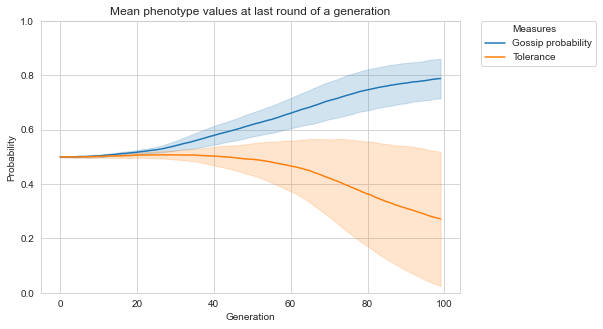

In [56]:
phenotype_df = pd.melt(all_sims_generations_dfs[['Generation', 'Gossip probability', 'Tolerance']], 'Generation', var_name='Measures', value_name='Probability')

fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot('Generation', 'Probability', hue='Measures', data=phenotype_df, ci='sd')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean phenotype values at last round of a generation')
plt.ylim(0,1)
plt.savefig(os.path.join(new_plot_path, "phenotypes_per_generation.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

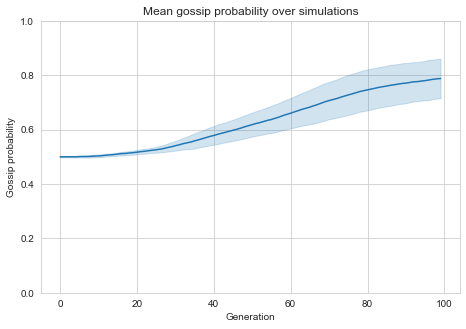

In [57]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=all_sims_generations_dfs, x='Generation', y='Gossip probability', ci='sd')
plt.title('Mean gossip probability over simulations')
plt.ylim(0,1)
plt.savefig(os.path.join(new_plot_path, "mean_gossip_probability_per_generation.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

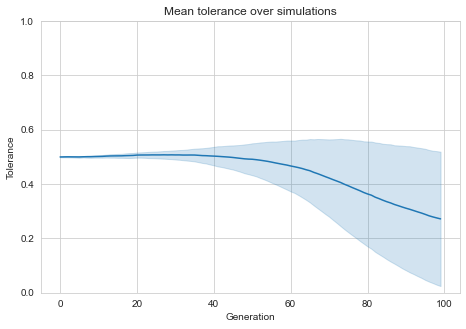

In [58]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=all_sims_generations_dfs, x='Generation', y='Tolerance', ci='sd')
plt.title('Mean tolerance over simulations')
plt.ylim(0,1)
plt.savefig(os.path.join(new_plot_path, "mean_tolerance_per_generation.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

In the three plots above you can see that there is a strong and 'reliable' benefit of developing gossip probability. However, the big standard deviation for tolerance indicates that it is not always beneficial. 

#### Tolerance vs. Gossip Probability

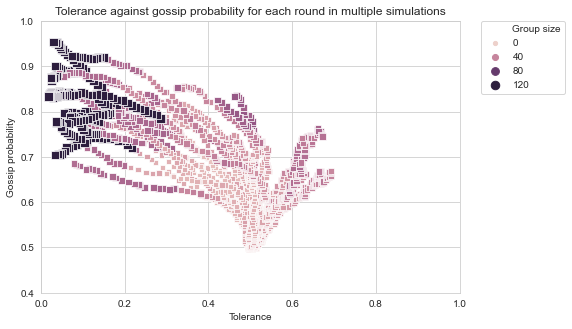

In [59]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.scatterplot(data=all_sims_generations_dfs, x='Tolerance', y='Gossip probability', hue='Group size', size='Group size', marker=',')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Tolerance against gossip probability for each round in multiple simulations')
plt.savefig(os.path.join(new_plot_path, "tolerance_vs_gossip.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

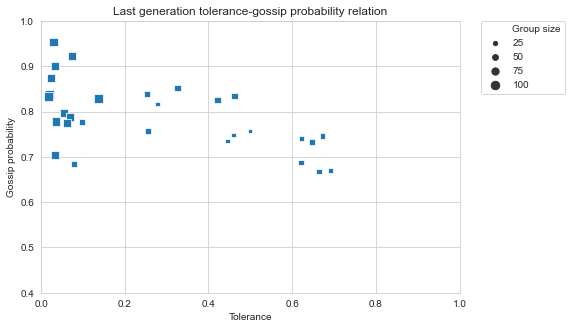

In [60]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.scatterplot(data=all_sims_generations_dfs.loc[all_sims_generations_dfs['Generation'] == 99], x='Tolerance', y='Gossip probability', size='Group size', palette='muted', marker=',')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Last generation tolerance-gossip probability relation')
plt.savefig(os.path.join(new_plot_path, "tolerance_vs_gossip_last_generation.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

The above two plots show that a combination of high gossip probability and tolerance is only beneficial if the average group size is relatively small. Larger groups often develop a high gossip probability but a low tolerance.

In [61]:
# phenotype_df = pd.melt(all_sims_groups_dfs[['Generation', 'Gossip probability', 'Tolerance']], 'Generation', var_name='Measures', value_name='Value')
# sns.relplot('Generation', 'Value', hue='Measures', data=phenotype_df, ci='sd', kind='line')

#### Insight into the plots of a single simulation (multiple groups survive)

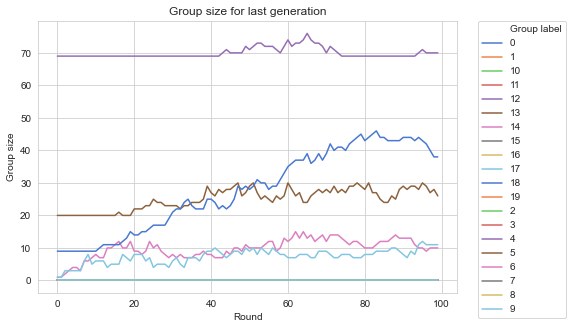

In [62]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=last_gen_df.loc[last_gen_df['Simulation'] == SIMULATION], x='Round', y='Group size', hue='Group label', palette='muted')
plt.title('Group size for last generation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figsize=(30, 10)
plt.savefig(os.path.join(new_plot_path, "last_gen_groupsize_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

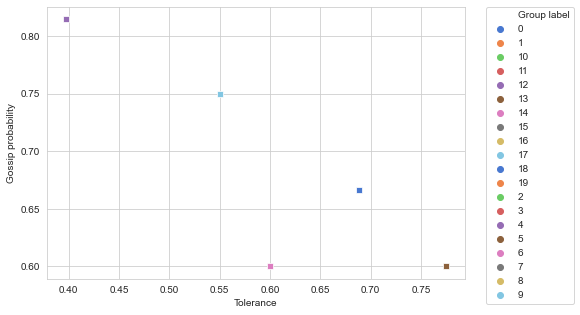

In [63]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.scatterplot(data=all_sims_groups_dfs.loc[(all_sims_groups_dfs['Generation'] == 99) & (all_sims_groups_dfs['Simulation'] == SIMULATION)], x='Tolerance', y='Gossip probability', hue="Group label", palette='muted', marker=',')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_tolvsgos_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

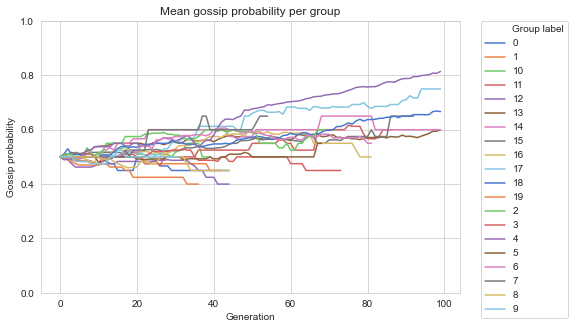

In [64]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Gossip probability', hue='Group label', palette='muted')
plt.ylim(0,1)
plt.title('Mean gossip probability per group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_gossip_probability_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

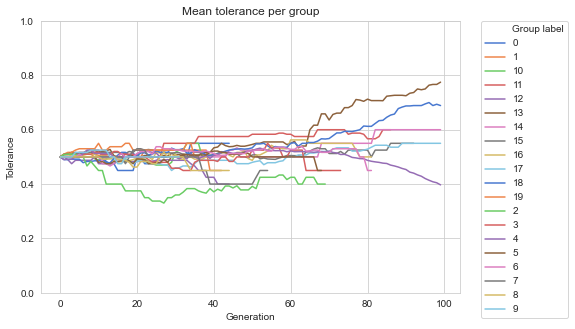

In [65]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Tolerance', hue='Group label', palette='muted')
plt.ylim(0,1)
plt.title('Mean tolerance per group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_tolerance_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

#### Insight into the plots of a single simulation (few groups survive)

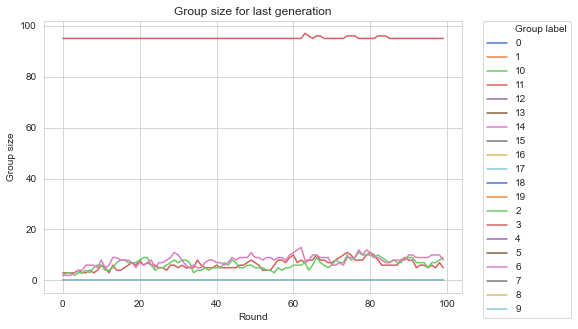

In [66]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=last_gen_df.loc[last_gen_df['Simulation'] == FEW_GROUPS_SIMULATION], x='Round', y='Group size', hue='Group label', palette='muted')
plt.title('Group size for last generation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_groupsize_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

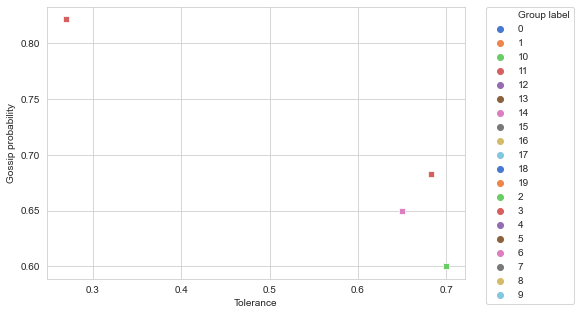

In [67]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.scatterplot(data=all_sims_groups_dfs.loc[(all_sims_groups_dfs['Generation'] == 99) & (all_sims_groups_dfs['Simulation'] == FEW_GROUPS_SIMULATION)], x='Tolerance', y='Gossip probability', hue="Group label", palette='muted', marker=',')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_tolvsgos_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

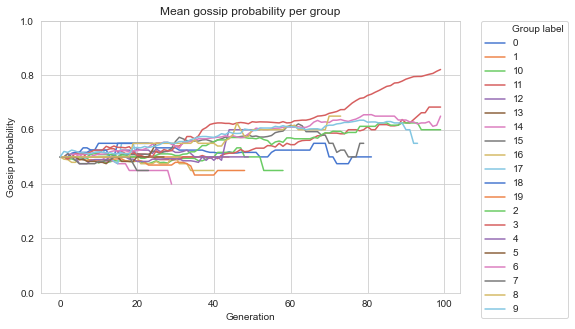

In [68]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == FEW_GROUPS_SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Gossip probability', hue='Group label', palette='muted')
plt.ylim(0,1)
plt.title('Mean gossip probability per group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_gossip_probability_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

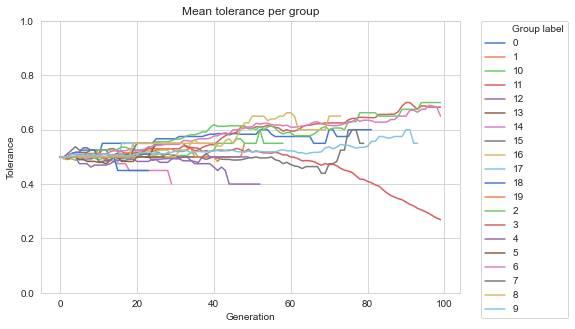

In [69]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == FEW_GROUPS_SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Tolerance', hue='Group label', palette='muted')
plt.ylim(0,1)
plt.title('Mean tolerance per group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "last_gen_tolerance_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')